In [4]:
import json;
import pandas as pd;
import scipy;
from scipy import stats;
# from apyori import apriori;
import matplotlib.pyplot as plt;
import numpy as np;
df = pd.read_csv("okcupid-profiles-csv.csv"); # , lines=True, chunksize=10000000

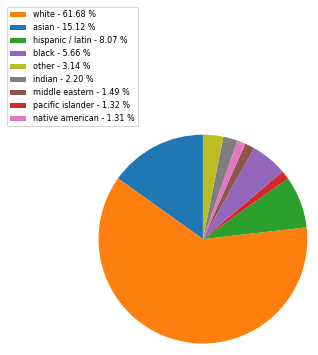

52466 entries
{'asian': 8205, 'white': 33472, 'hispanic / latin': 4379, 'pacific islander': 717, 'black': 3071, 'middle eastern': 811, 'native american': 709, 'indian': 1196, 'other': 1706}


In [23]:
def clean(string):
    str_list = string.split(',')
    return str_list[0]

ethnic_dict = {}
# copy hist for'ethnicity', ('age' vs. 'offspring')
for entry in df.loc[:, 'ethnicity']:
    key = clean(str(entry))
    if key in ethnic_dict:
        ethnic_dict[key] += 1
    else:
        ethnic_dict[key] = 1

x = ethnic_dict.keys()
y = ethnic_dict.values()
porcent = list(map(lambda x: x*100, y))
sum_y = sum(y)
alf = lambda x,y: list(map(lambda x2: x2/y, x))
porcent = alf(porcent, sum_y)
patches, texts = plt.pie(y, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='lower center', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)

plt.show()
print('52466 entries')
print(ethnic_dict)